HEllo this is for data

https://www.kaggle.com/datasets/manjeetsingh/retaildataset/data

First going to add the prereqs

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Let's import the data and look at it

In [23]:
df_features = pd.read_csv('Retaildatakaggle/Features_data_set.csv')
df_sales = pd.read_csv('Retaildatakaggle/Sales_data_set.csv')
df_stores = pd.read_csv('Retaildatakaggle/Stores_data_set.csv')

In [24]:

print(df_features.head())
print(df_features.columns)
print(df_features.info())


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI

In [25]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [27]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [28]:
print( "Number of features:", df_features.shape[0])
print( "Number of sales records:", df_sales.shape[0])
print( "Number of stores:", df_stores.shape[0])         

Number of features: 8190
Number of sales records: 421570
Number of stores: 45


##### Here's some scratch EDA but its averaging each of the features so it might not be useful. This could be a good way to have a simple analysis if we just want to see the average of what feature impacts sales the most. I think it would be good to explore the data across the time as well but we can ponder more on specifics later.

In [50]:
#Want to average some things and add it to the df_stores dataframe
df_stores['Avg_fuel'] = df_features.groupby('Store')['Fuel_Price'].mean()
df_stores['Avg_CPI'] = df_features.groupby('Store')['CPI'].mean()
df_stores['Avg_Unemployment'] = df_features.groupby('Store')['Unemployment'].mean()
df_stores['Avg_Weekly_Sales'] = df_sales.groupby('Store')['Weekly_Sales'].mean()
df_stores['Avg_temp'] = df_features.groupby('Store')['Temperature'].mean()
print(df_stores.head())

   Store Type    Size  Avg_fuel     Avg_CPI  Avg_Unemployment  \
0      1    A  151315       NaN         NaN               NaN   
1      2    A  202307  3.259242  217.271679          7.440994   
2      3    B   37392  3.259242  216.918640          7.403959   
3      4    A  205863  3.259242  220.690122          7.006006   
4      5    B   34875  3.254885  129.197091          5.647450   

   Avg_Weekly_Sales   Avg_temp  
0               NaN        NaN  
1      21710.543621  66.912033  
2      26898.070031  66.728407  
3       6373.033983  70.394176  
4      29161.210415  61.416648  


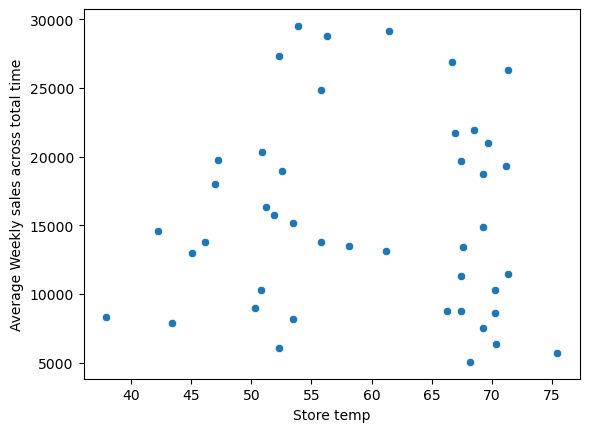

In [ ]:
sns.scatterplot(x=df_stores['Avg_temp'], y =df_stores['Avg_Weekly_Sales'])

plt.ylabel('Average Weekly sales across total time')
plt.xlabel('Store temp')
plt.show()

Here's a bunch of pairplots, still on averages

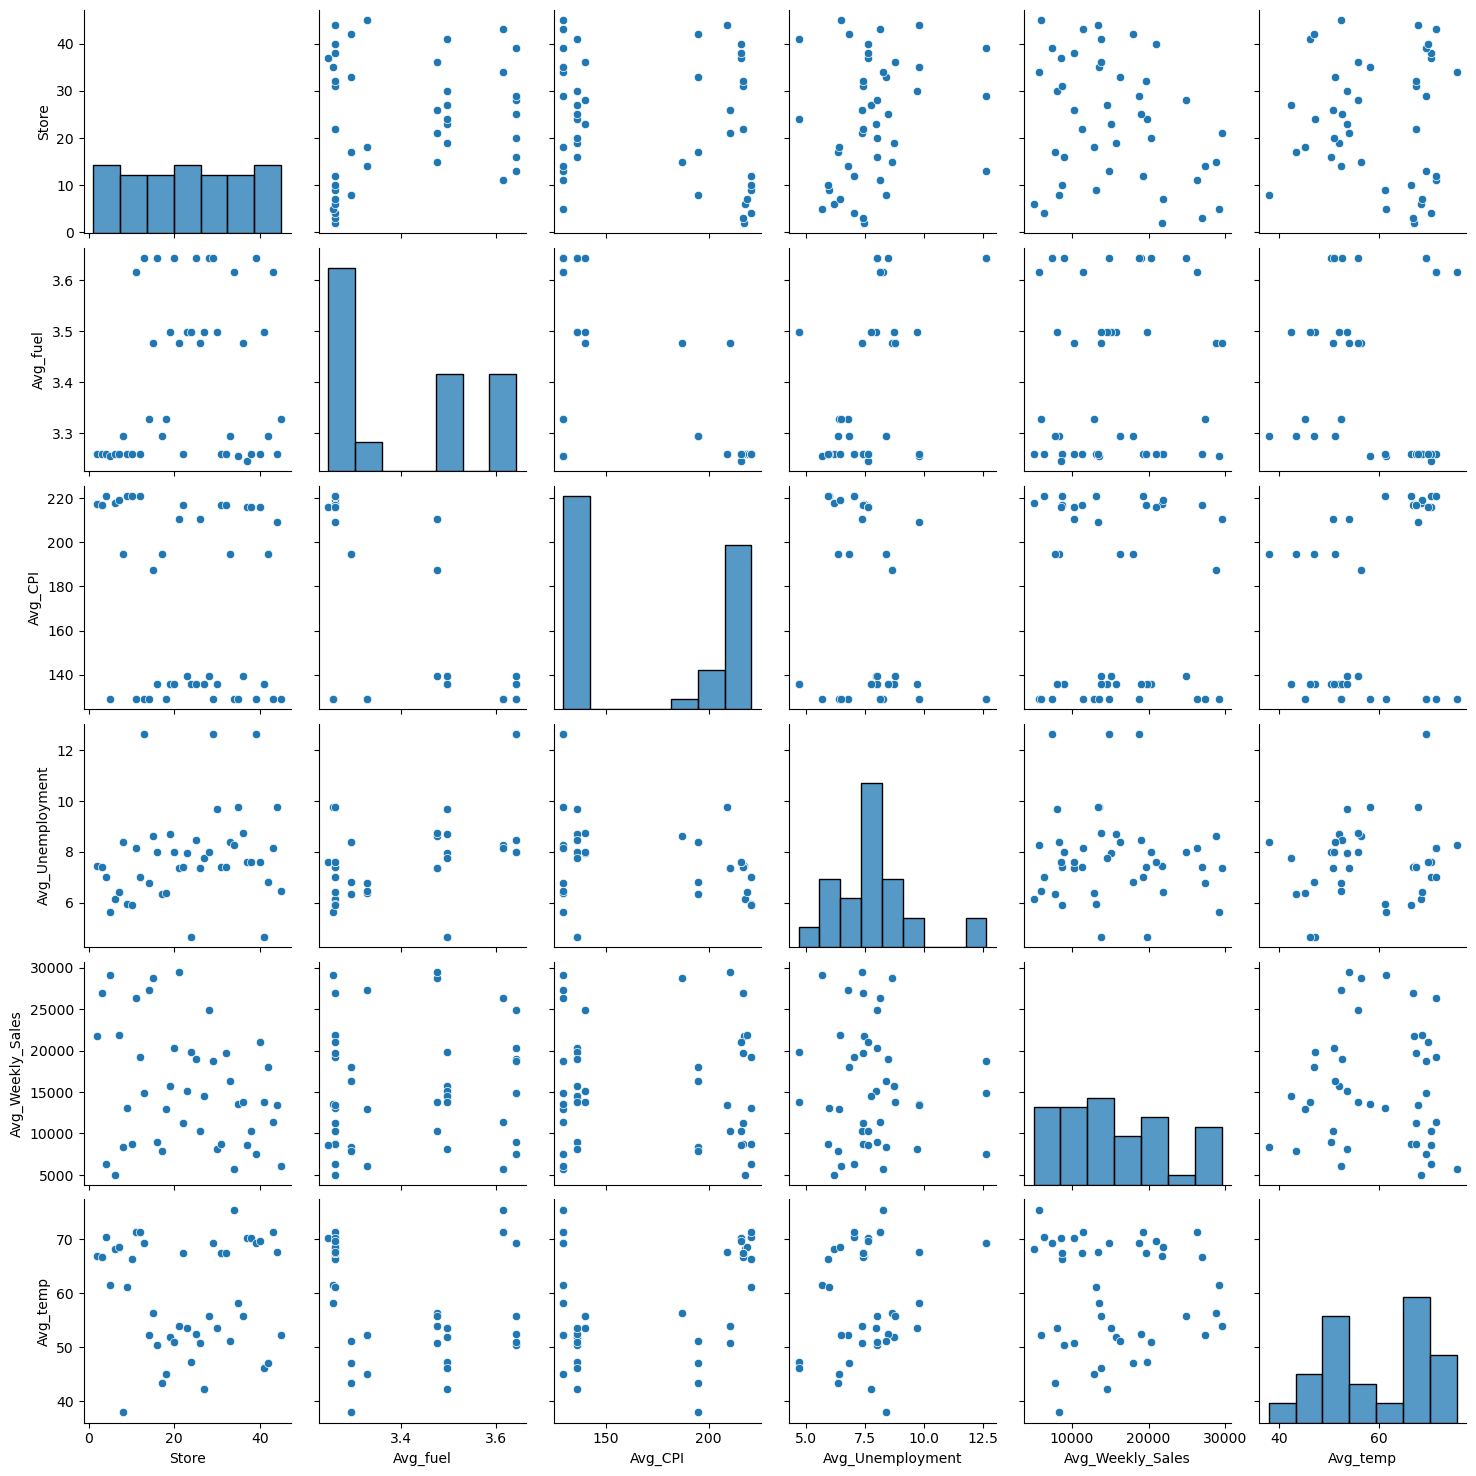

In [54]:
sns.pairplot(data = df_stores, vars=['Store', 'Avg_fuel', 'Avg_CPI', 'Avg_Unemployment', 'Avg_Weekly_Sales', 'Avg_temp'])
plt.show()

NN- Honestly don't see anything clear here. this is also a blind average without accounting for markdowns or holidays so maybe this can be ignored and a different attempt can be done

NN- idea for the better thing to explore maybe can be looking at a single store, say store 1. then graph weekly sales over each week and see how things change over time. then decide what else to graph. but overall aim would be predicting the future sales. We can also make different jupyter notebooks to make it more organized

In [61]:
#Here is isolating store 1 features and sales data
print(df_features[df_features.Store == 1].head())
print(df_sales[df_sales.Store == 1].head())


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
   Store  Dept        Date  Weekly_Sales  IsHoliday  Avg_fuel
0      1     1  05/02/2010      24924.50      False       NaN
1    